In [1]:
%load_ext autoreload
%autoreload 2

In [41]:
from typing import Optional
import yaml
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from torchvision.transforms import v2 as T # type: ignore
#from torchvision.models import resnet18, ResNet18_Weights
from geovision.config.basemodels import ExperimentConfig # noqa
from geovision.data.module import ImageDatasetDataModule
#from geovision.training.module import ClassificationModule

transforms: dict[str, T.Transform | None] = {
    "image_transform": T.Compose([T.ToImage(), T.ToDtype(torch.float32)]),
    "target_transform": None,
    "common_transform": None,
}

config = ExperimentConfig.from_config_file("config.yaml", transforms)
datamodule = ImageDatasetDataModule(config)
#classifier = ClassificationModule(
    #config = config, 
    #model = resnet18(num_classes = config.dataset.num_classes)
#)
datamodule.setup("fit")
ds = datamodule.train_dataset
dl = datamodule.train_dataloader()

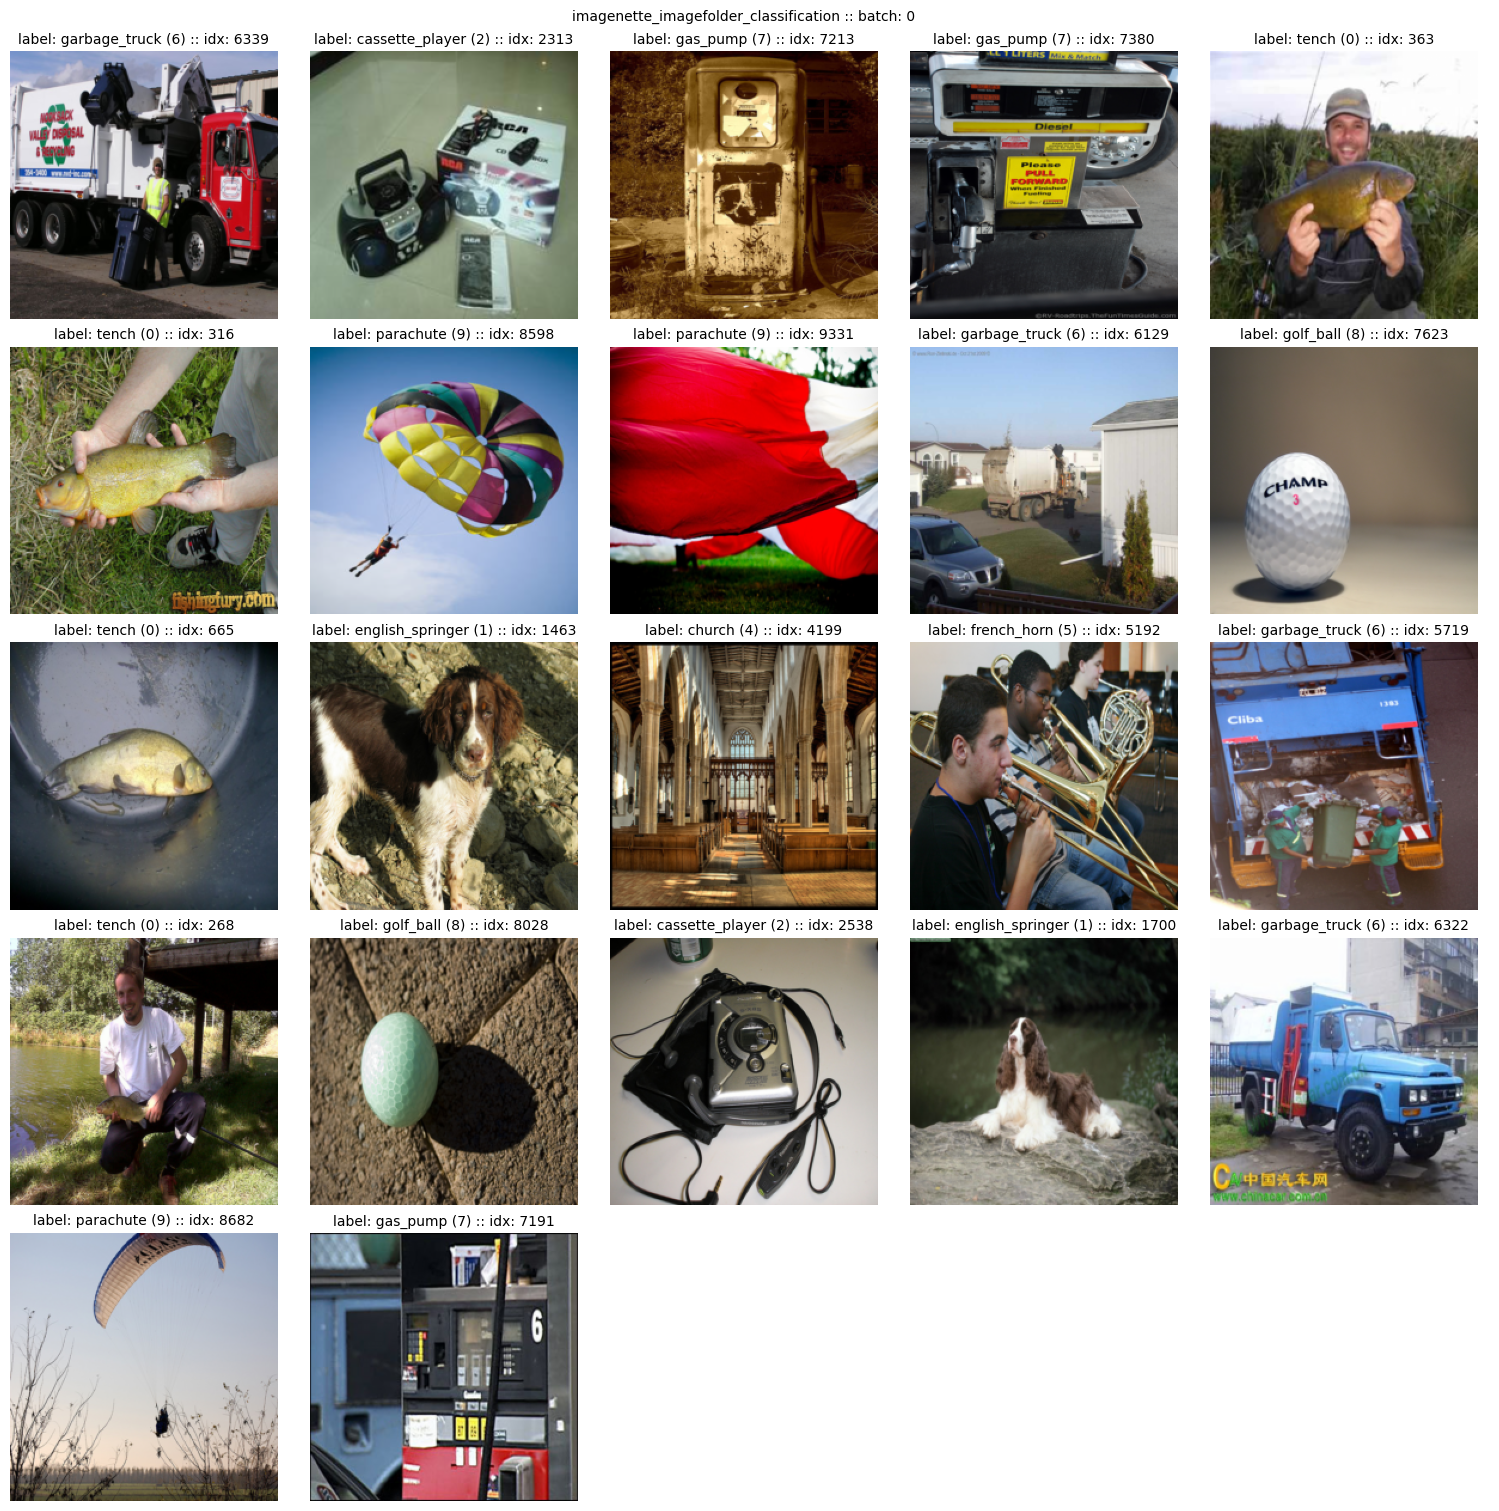

In [43]:
from geovision.analysis.viz import plot_batch
plot_batch(ds, next(iter(dl)), 0)